In [ ]:
%pip install seaborn

In [87]:
import seaborn as sns
import pandas as pd
from glob import glob
sns.set_theme()

In [88]:
latency_names = [
    'Number of Nodes', 'Node of Faulty Nodes', 'Protocol', 'Chunk Size', 'K', 
    'Number of Packet / Node / Block', 'Number of Correct Packets',
    'Mesh Degree', 'Placement Group Size', 'Operation', 'Latency (us)']
latency_data = pd.concat([
    pd.read_csv(rows, names=latency_names) for rows in glob('saved/latency-*.csv')
], ignore_index=True)
latency_data['Latency (s)'] = latency_data['Latency (us)'] / 1_000_000
latency_data

,Number of Nodes,Node of Faulty Nodes,Protocol,Chunk Size,K,Number of Packet / Node / Block,Number of Correct Packets,Mesh Degree,Placement Group Size,Operation,Latency (us),Latency (s)
0,10000,3333,Entropy,32768,32768,10,33340,6,0,put/remote,98701938,98.701938
1,10000,3333,Entropy,32768,32768,10,33340,6,0,get/remote,54432418,54.432418
2,10000,3333,Entropy,32768,32768,10,33340,6,0,put/remote,88430226,88.430226
3,10000,3333,Entropy,32768,32768,10,33340,6,0,get/remote,67168781,67.168781
4,10000,3333,Entropy,32768,32768,10,33340,6,0,put/remote,121151575,121.151575
...,...,...,...,...,...,...,...,...,...,...,...,...
227,10000,3333,Entropy,32768,32768,10,33340,6,0,get,9139482,9.139482
228,10000,3333,Entropy,32768,32768,10,33340,6,0,put,34791347,34.791347
229,10000,3333,Entropy,32768,32768,10,33340,6,0,get,11163657,11.163657
230,10000,3333,Entropy,32768,32768,10,33340,6,0,put,32222382,32.222382


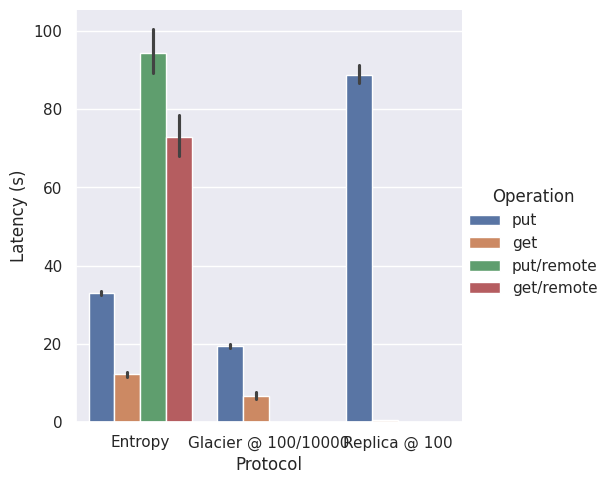

In [90]:
f_latency = sns.catplot(
    data=latency_data,
    kind='bar',
    x='Protocol', y='Latency (s)',
    order=['Entropy', 'Glacier', 'Replication'],
    hue='Operation',
    hue_order=['put', 'get', 'put/remote', 'get/remote'],
)
f_latency.set_xticklabels(['Entropy', 'Glacier @ 100', 'Replica @ 100'])

In [ ]:
tput_names = [
    'Number of Nodes', 'Node of Faulty Nodes', 'Protocol', 'Chunk Size', 'K', 
    'Number of Packet / Node / Block', 'Number of Correct Packets',
    'Mesh Degree', 'Placement Group Size', 'Count', 'Concurrency', 'Duration (us)']
tput_data = pd.concat([
    pd.read_csv(rows, names=tput_names) for rows in glob('saved/tput-*.csv')
], ignore_index=True)
tput_data['Throughput (MB/s)'] = tput_data['Count'] * (1 << 10) / (tput_data['Duration (us)'] / 1_000_000)
tput_data

In [ ]:
f_tput = sns.relplot(
    data=tput_data,
    kind='line',
    x='Concurrency', y='Throughput (MB/s)',
    hue='Protocol',
    style='Protocol', markers='o',
)
# f_tput.set(yscale='log')